In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt,ceil
from sklearn.metrics import f1_score , confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import warnings
#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")  

In [2]:
df = pd.read_csv(r'C:\Users\subra\OneDrive\Desktop\datasets\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Dataset understanding

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [9]:
df.iloc[0:5,3:7]

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340


In [10]:
df.sort_index(inplace=True)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Missing Values

Datasets tends to have a few missing values. Pandas offers us isna function to find out the null values and fillna function to fill values. Mean has been used to fill the values in this case

In [11]:
nMean = df['N'].mean()
print('Null Values in N col:',df['N'].isna().sum())
df['N'].fillna(nMean,inplace = True)
print('Null Values Remplaced by:', nMean)

print() 

pMean = df['P'].mean()
print('Null Values in P col:',df['P'].isna().sum())
df['P'].fillna(pMean,inplace = True)
print('Null Values Remplaced by:', pMean)

print()

kMean = df['K'].mean()
print('Null Values in K col:',df['K'].isna().sum())
df['K'].fillna(nMean,inplace = True)
print('Null Values Remplaced by:', kMean)

print()

tempMean = df['temperature'].mean()
print('Null Values in temperature col:',df['temperature'].isna().sum())
df['temperature'].fillna(tempMean,inplace = True)
print('Null Values Remplaced by:', tempMean)

print()

humMean = df['humidity'].mean()
print('Null Values in humidity col:',df['humidity'].isna().sum())
df['humidity'].fillna(humMean,inplace = True)
print('Null Values Remplaced by:', humMean)

print()

phMean = df['ph'].mean()
print('Null Values in ph col:',df['ph'].isna().sum())
df['ph'].fillna(phMean,inplace = True)
print('Null Values Remplaced by:', phMean)

print()

rainMean = df['rainfall'].mean()
print('Null Values in rainfall col:',df['rainfall'].isna().sum())
df['rainfall'].fillna(rainMean,inplace = True)
print('Null Values Remplaced by:', rainMean)

Null Values in N col: 0
Null Values Remplaced by: 50.551818181818184

Null Values in P col: 0
Null Values Remplaced by: 53.36272727272727

Null Values in K col: 0
Null Values Remplaced by: 48.14909090909091

Null Values in temperature col: 0
Null Values Remplaced by: 25.616243851779544

Null Values in humidity col: 0
Null Values Remplaced by: 71.48177921778637

Null Values in ph col: 0
Null Values Remplaced by: 6.469480065256364

Null Values in rainfall col: 0
Null Values Remplaced by: 103.46365541576817


### Encoding

The column 'label' consists of non-numerical values with nominal categories and hence they must be encoded. The basic idea we had with the Label and One Hot encoding seemed to have various disadvantages (such as pseudo-ordinality with the former, weakening of corrolations with the latter and many) which can cause significanace drop in the performance and accuracy with the given dataset.

Hence, we decided to look into the research papers about encoding and came up with the conclusion of trying out One Hot Encoding and Binary Encoding in the initial stages and adopt the suitable based on the results.

In [12]:
#One Hot Encoding
one_hot_encoded=pd.get_dummies(df,columns=['label'])
print(one_hot_encoded)

        N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536            0   
1      85  58  41    21.770462  80.319644  7.038096  226.655537            0   
2      60  55  44    23.004459  82.320763  7.840207  263.964248            0   
3      74  35  40    26.491096  80.158363  6.980401  242.864034            0   
4      78  42  42    20.130175  81.604873  7.628473  262.717340            0   
...   ...  ..  ..          ...        ...       ...         ...          ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507            0   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610            0   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839            0   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293            0   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041            0   

      label_banana  label_blackgram  ..

In [13]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['label'],return_df=True)
data_encoded=encoder.fit_transform(df) 
data_encoded

,N,P,K,temperature,humidity,ph,rainfall,label_0,label_1,label_2,label_3,label_4
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1,0,1,1,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,1,0,1,1,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,1,0,1,1,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1,0,1,1,0


### Statistical Analysis

In [14]:
#mean
df.mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [15]:
#median
df.median()

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [16]:
#mode
from scipy.stats import mode

In [17]:
for column in list(df):
  value_list=df[column].tolist()
  print("mode of {} is {}".format(column,mode(value_list)[0][0]))

mode of N is 22
mode of P is 60
mode of K is 17
mode of temperature is 8.825674745
mode of humidity is 14.25803981
mode of ph is 3.504752314
mode of rainfall is 20.21126747
mode of label is apple


### Labels / Classes

Classes in the dataset is in the column 'Label'. The nunique function is used to find the ​number of classes, unique to find the different classes and value_counts to find out the number ​of times each class occurs in the dataset

In [18]:
df['label'].nunique()

22

In [19]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [20]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### Outliers

Datasets tend to have outliers. Outliers are values which lie lower than Q1 - 1.5IQR​ or higher than Q3 + 1.5IQR. Box plots have been used to visualize the presence of outliers​

<AxesSubplot:>

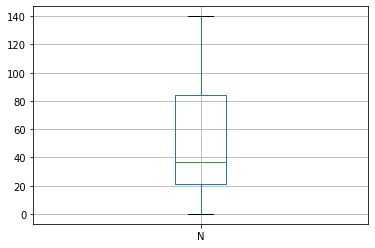

In [21]:
df.boxplot(column=['N'])

<AxesSubplot:>

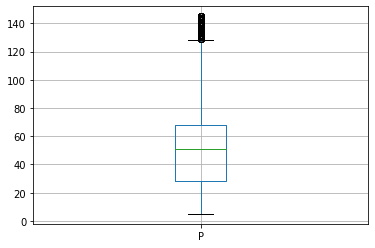

In [22]:
df.boxplot(column=['P'])

<AxesSubplot:>

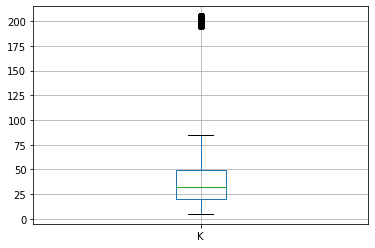

In [23]:
df.boxplot(column=['K'])

<AxesSubplot:>

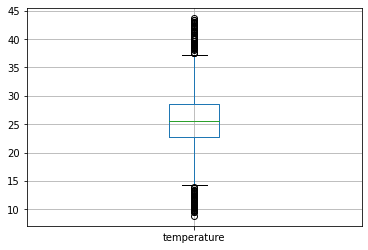

In [24]:
df.boxplot(column=['temperature'])

<AxesSubplot:>

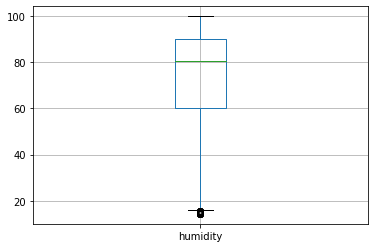

In [25]:
df.boxplot(column=['humidity'])

<AxesSubplot:>

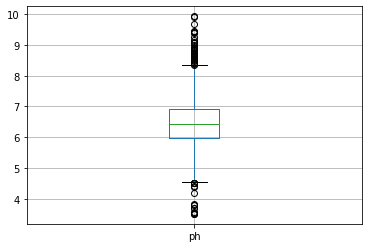

In [26]:
df.boxplot(column=['ph'])

<AxesSubplot:>

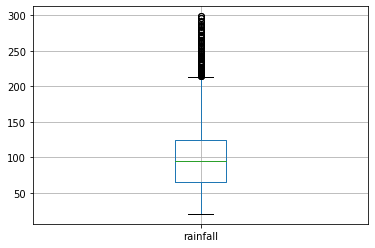

In [27]:
df.boxplot(column=['rainfall'])

### Visualisation

Histograms of bin size 10 has been used to visualize the spread and distribution of data.​

<AxesSubplot:>

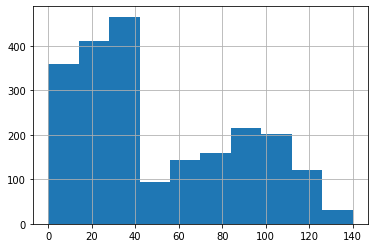

In [28]:
df['N'].hist(bins = 10)

<AxesSubplot:>

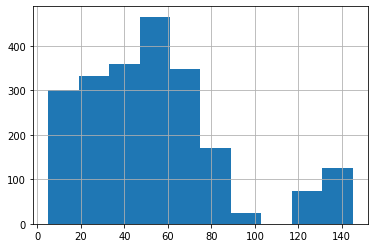

In [29]:
df['P'].hist(bins = 10)

<AxesSubplot:>

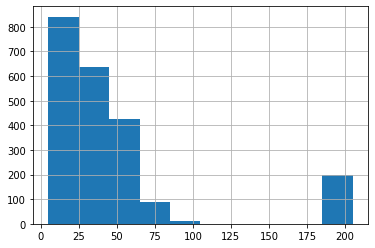

In [30]:
df['K'].hist(bins = 10)

<AxesSubplot:>

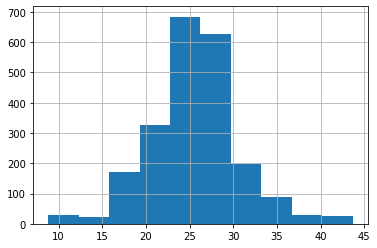

In [31]:
df['temperature'].hist(bins = 10)

<AxesSubplot:>

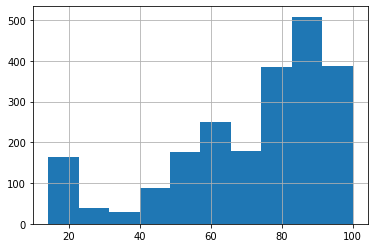

In [32]:
df['humidity'].hist(bins = 10)

<AxesSubplot:>

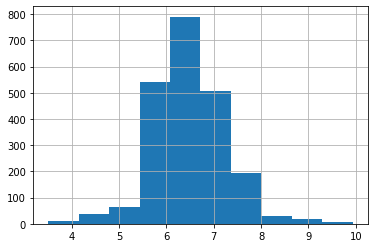

In [33]:
df['ph'].hist(bins = 10)

<AxesSubplot:>

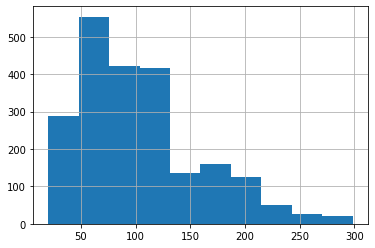

In [34]:
df['rainfall'].hist(bins = 10)

### Train Test Split

Datasets are split into two, Training data and Testing data. ​The training data is used to train the model and the testing data is ​used to test and validate the model. The dataset is divided into two ​in ratio 80/20.

In [35]:
X = df.drop(['label'], axis = 1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [37]:
Y = df['label']
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

### Training Models

#### KNN

In [39]:
k = ceil(sqrt(len(X_train)) / 2) 
KNN_model = KNeighborsClassifier(n_neighbors = k)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [40]:
y_pred = KNN_model.predict(X_test)

In [41]:
KNN_score = KNN_model.score(X_test, y_test)
KNN_score

0.9227272727272727

In [42]:
KNN_precision = precision_score(y_test, y_pred, average = 'macro')
KNN_precision

0.9317610509896959

In [43]:
KNN_recall = recall_score(y_test, y_pred, average='macro')
KNN_recall

0.9263448961860593

In [44]:
KNN_f1 = f1_score(y_test,y_pred,average= 'macro')
KNN_f1

0.9192345410962066

In [45]:
KNN_confusion = confusion_matrix(y_test, y_pred)
print(KNN_confusion)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  4  0  2 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

#### Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
predicted_values = NaiveBayes.predict(X_test)

In [47]:
NaiveBayes.score(X_test, y_test)

0.9954545454545455

In [48]:
NaiveBayes_precision = precision_score(y_test, predicted_values, average = 'macro')
NaiveBayes_precision

0.9963636363636365

In [49]:
NaiveBayes_recall = recall_score(y_test, predicted_values, average='macro')
NaiveBayes_recall

0.9952153110047847

In [50]:
NaiveBayes_f1 = f1_score(y_test,predicted_values,average= 'macro')
NaiveBayes_f1

0.9955808080808081

In [51]:
NaiveBayes_confusion = confusion_matrix(y_test, predicted_values)
print(NaiveBayes_confusion)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

#### Decision tree

In [52]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [53]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [54]:
print("Classification Metrices : ")

print("Accuracy:",accuracy_score(y_test, y_pred))
dt_a = accuracy_score(y_test, y_pred)

print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
dt_f = f1_score(y_test, y_pred, average='weighted')

print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
dt_p = precision_score(y_test,y_pred, average='weighted')

print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
dt_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9840909090909091
F1 Score: 0.9841139158027783
Precision:  0.984375
Recall:  0.9840909090909091


Text(69.0, 0.5, 'Actual')

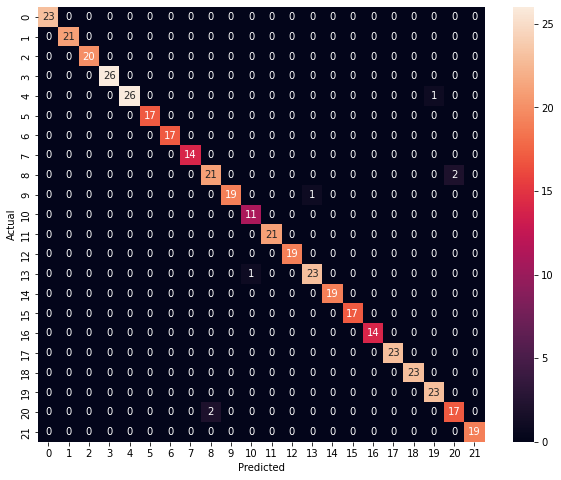

In [55]:
plt.figure(figsize=(10,8)) 
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

#### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
clf_rf.fit(X_train, y_train)
rf_predicted_values = clf_rf.predict(X_test)

In [57]:
print("Accuracy: {}".format(accuracy_score(y_test, rf_predicted_values)))
print("f1 score: {}".format(f1_score(y_test, rf_predicted_values, average='weighted')))
print("Precision score: {}".format(precision_score(y_test,rf_predicted_values, average='weighted')))
print("Recall score: {}".format(recall_score(y_test,rf_predicted_values,average = 'weighted')))
print(confusion_matrix(y_test,rf_predicted_values))

Accuracy: 0.9931818181818182
f1 score: 0.9931754816901672
Precision score: 0.9937348484848485
Recall score: 0.9931818181818182
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  

#### Multi-Layer Perceptron

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,45,30,25,15,), random_state=1, max_iter=300, warm_start=True).fit(X_train, y_train)

In [59]:
mlp_predicted_values=mlp.predict(X_test)

In [60]:
print("Accuracy: {}".format(accuracy_score(y_test, mlp_predicted_values)))
print("f1 score: {}".format(f1_score(y_test, mlp_predicted_values, average='weighted')))
print("Precision score: {}".format(precision_score(y_test,mlp_predicted_values, average='weighted')))
print("Recall score: {}".format(recall_score(y_test,mlp_predicted_values,average = 'weighted')))
print(confusion_matrix(y_test,mlp_predicted_values))

Accuracy: 0.975
f1 score: 0.9754264311076949
Precision score: 0.9790055315055315
Recall score: 0.975
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [